# **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import requests
import csv
from io import StringIO
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import psycopg2

In [ ]:
pip install python-dateutil


In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Menghitung end_date dan start_date sesuai dengan permintaan
end_date = (datetime.now() - timedelta(days=5)).strftime('%Y-%m-%d')
start_date = (datetime.now() - relativedelta(years=3, days=5)).strftime('%Y-%m-%d')

# Ticker untuk USD ke ISK
ticker = "USDISK=X"

# Mendapatkan data historis dari yfinance dengan interval harian
data = yf.download(ticker, start=start_date, end=end_date, interval="1d")

# Menyimpan data ke file CSV
data.to_csv("usd_to_isk.csv")

print("Data berhasil disimpan ke usd_to_isk.csv")


[*********************100%***********************]  1 of 1 completed

Data berhasil disimpan ke usd_to_isk.csv


In [ ]:
data1 = pd.read_csv('usd_to_isk.csv')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      786 non-null    object
 1   Adj Close  785 non-null    object
 2   Close      785 non-null    object
 3   High       785 non-null    object
 4   Low        785 non-null    object
 5   Open       785 non-null    object
 6   Volume     785 non-null    object
dtypes: object(7)
memory usage: 43.1+ KB


In [ ]:
data1


,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,USDISK=X,USDISK=X,USDISK=X,USDISK=X,USDISK=X,USDISK=X
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-11-15 00:00:00+00:00,131.1199951171875,131.1199951171875,131.4499969482422,130.89999389648438,131.1300048828125,0
3,2021-11-16 00:00:00+00:00,132.00999450683594,132.00999450683594,132.44000244140625,131.8000030517578,132.02999877929688,0
4,2021-11-17 00:00:00+00:00,132.58999633789062,132.58999633789062,132.91000366210938,131.63999938964844,132.6199951171875,0
...,...,...,...,...,...,...,...
781,2024-11-08 00:00:00+00:00,137.08999633789062,137.08999633789062,138.55999755859375,137.0500030517578,137.0800018310547,0
782,2024-11-11 00:00:00+00:00,138.44000244140625,138.44000244140625,139.2100067138672,138.32000732421875,138.4499969482422,0
783,2024-11-12 00:00:00+00:00,138.42999267578125,138.42999267578125,139.13999938964844,138.39999389648438,138.39999389648438,0
784,2024-11-13 00:00:00+00:00,138.63999938964844,138.63999938964844,139.42999267578125,138.47000122070312,138.63999938964844,0


In [ ]:

data1['Price'].value_counts()


,count
Price,
Ticker,1
2023-11-03 00:00:00+00:00,1
2023-11-07 00:00:00+00:00,1
2023-11-08 00:00:00+00:00,1
2023-11-09 00:00:00+00:00,1
...,...
2022-11-16 00:00:00+00:00,1
2022-11-17 00:00:00+00:00,1
2022-11-18 00:00:00+00:00,1


In [ ]:
data1['Adj Close'].value_counts()


,count
Adj Close,
137.0500030517578,4
139.13999938964844,4
137.10000610351562,4
137.08999633789062,4
137.67999267578125,3
...,...
143.13999938964844,1
144.17999267578125,1
143.1699981689453,1


In [ ]:
data1['Close'].value_counts()


,count
Close,
137.0500030517578,4
139.13999938964844,4
137.10000610351562,4
137.08999633789062,4
137.67999267578125,3
...,...
143.13999938964844,1
144.17999267578125,1
143.1699981689453,1


In [ ]:
data1['High'].value_counts()


,count
High,
137.0,6
139.83999633789062,5
137.58999633789062,4
136.88999938964844,4
137.75999450683594,4
...,...
144.75,1
144.91000366210938,1
145.16000366210938,1


In [ ]:
data1['Low'].value_counts()


,count
Low,
136.47999572753906,5
138.77999877929688,4
137.94000244140625,4
136.5,4
139.10000610351562,4
...,...
141.22000122070312,1
140.5800018310547,1
140.10000610351562,1


In [ ]:
data1['Open'].value_counts()


,count
Open,
136.64999389648438,5
137.0500030517578,4
130.6199951171875,4
131.55999755859375,4
137.07000732421875,4
...,...
143.47000122070312,1
141.7100067138672,1
143.13999938964844,1


In [ ]:
data1['Volume'].value_counts()


,count
Volume,
0,784
USDISK=X,1


Feature Engineering on First Data


In [ ]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      786 non-null    object
 1   Adj Close  785 non-null    object
 2   Close      785 non-null    object
 3   High       785 non-null    object
 4   Low        785 non-null    object
 5   Open       785 non-null    object
 6   Volume     785 non-null    object
dtypes: object(7)
memory usage: 43.1+ KB


In [ ]:
data1 = data1.drop(['Adj Close'], axis = 1)


In [ ]:
data1 = data1.drop(['High'], axis = 1)


In [ ]:
data1 = data1.drop(['Low'], axis = 1)


In [ ]:
data1 = data1.drop(['Open'], axis = 1)


In [ ]:
data1 = data1.drop(['Volume'], axis = 1)


In [ ]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   786 non-null    object
 1   Close   785 non-null    object
dtypes: object(2)
memory usage: 12.4+ KB


In [ ]:
data1.columns = ["date", "rate"]


In [ ]:
data1

,date,rate
0,Ticker,USDISK=X
1,Date,NaN
2,2021-11-15 00:00:00+00:00,131.1199951171875
3,2021-11-16 00:00:00+00:00,132.00999450683594
4,2021-11-17 00:00:00+00:00,132.58999633789062
...,...,...
781,2024-11-08 00:00:00+00:00,137.08999633789062
782,2024-11-11 00:00:00+00:00,138.44000244140625
783,2024-11-12 00:00:00+00:00,138.42999267578125
784,2024-11-13 00:00:00+00:00,138.63999938964844


In [ ]:
print(data1.head())  # Tampilkan beberapa baris pertama


                        date                rate
0                     Ticker            USDISK=X
1                       Date                 NaN
2  2021-11-15 00:00:00+00:00   131.1199951171875
3  2021-11-16 00:00:00+00:00  132.00999450683594
4  2021-11-17 00:00:00+00:00  132.58999633789062


In [ ]:
# Hapus baris yang mengandung nilai tertentu di kolom 'date' atau 'rate'
data1 = data1[~data1["date"].astype(str).str.contains("Ticker|Date", na=False)]
data1 = data1.dropna(subset=["date"])  # Menghapus baris dengan NaN di kolom 'date'


In [ ]:
data1


,date,rate
2,2021-11-15 00:00:00+00:00,131.1199951171875
3,2021-11-16 00:00:00+00:00,132.00999450683594
4,2021-11-17 00:00:00+00:00,132.58999633789062
5,2021-11-18 00:00:00+00:00,131.7100067138672
6,2021-11-19 00:00:00+00:00,130.39999389648438
...,...,...
781,2024-11-08 00:00:00+00:00,137.08999633789062
782,2024-11-11 00:00:00+00:00,138.44000244140625
783,2024-11-12 00:00:00+00:00,138.42999267578125
784,2024-11-13 00:00:00+00:00,138.63999938964844


In [ ]:
data1["date"] = pd.to_datetime(data1["date"]).dt.strftime('%Y-%m-%d')


In [ ]:
data1 = data1.sort_values(by='date', ascending=True, ignore_index=True)


In [ ]:
data1


,date,rate
0,2021-11-15,131.1199951171875
1,2021-11-16,132.00999450683594
2,2021-11-17,132.58999633789062
3,2021-11-18,131.7100067138672
4,2021-11-19,130.39999389648438
...,...,...
779,2024-11-08,137.08999633789062
780,2024-11-11,138.44000244140625
781,2024-11-12,138.42999267578125
782,2024-11-13,138.63999938964844


In [ ]:
data1.to_csv('usd_to_isk_new.csv', index=False)


In [ ]:
import pandas as pd
import requests
import csv
from io import StringIO
from datetime import datetime

In [ ]:
from datetime import datetime, timedelta # Import timedelta
from dateutil.relativedelta import relativedelta

# Menghitung end_date dan start_date sesuai dengan permintaan
end_date = (datetime.now() - timedelta(days=5)).strftime('%Y-%m-%d')
start_date = (datetime.now() - relativedelta(years=2, days=5)).strftime('%Y-%m-%d')

# Mengupdate parameter URL
params = {
    "latitude": 64.9631,
    "longitude": -19.0208,
    "start_date": start_date,
    "end_date": end_date,
    "daily": "weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant",
    "timezone": "auto"
}

start_date, end_date, params

('2022-11-15',
 '2024-11-15',
 {'latitude': 64.9631,
  'longitude': -19.0208,
  'start_date': '2022-11-15',
  'end_date': '2024-11-15',
  'daily': 'weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant',
  'timezone': 'auto'})

In [ ]:
# WMO Weather Code Descriptions
weather_code_descriptions = {
    0: "Clear sky",
    1: "Mainly clear",
    2: "Partly cloudy",
    3: "Overcast",
    45: "Fog",
    48: "Depositing rime fog",
    51: "Drizzle: Light",
    53: "Drizzle: Moderate",
    55: "Drizzle: Dense intensity",
    56: "Freezing Drizzle: Light",
    57: "Freezing Drizzle: Dense intensity",
    61: "Rain: Slight",
    63: "Rain: Moderate",
    65: "Rain: Heavy intensity",
    66: "Freezing Rain: Light",
    67: "Freezing Rain: Heavy",
    71: "Snow fall: Slight",
    73: "Snow fall: Moderate",
    75: "Snow fall: Heavy",
    77: "Snow grains",
    80: "Rain showers: Slight",
    81: "Rain showers: Moderate",
    82: "Rain showers: Violent",
    85: "Snow showers: Slight",
    86: "Snow showers: Heavy",
    95: "Thunderstorm: Slight or moderate",
    96: "Thunderstorm with slight hail",
    99: "Thunderstorm with heavy hail",
}

In [ ]:
# Mengirim permintaan GET ke API
response = requests.get(url, params=params)

# Memeriksa status permintaan
if response.status_code == 200:
    data = response.json()

    # Ambil data daily
    daily_data = data.get("daily", {})

    if daily_data:
        # Convert to DataFrame
        df = pd.DataFrame(daily_data)

        # Add weather code descriptions
        df["weather_description"] = df["weather_code"].map(weather_code_descriptions)

        # Save to CSV
        df.to_csv("weather.csv", index=False)
        print("Data has been saved to weather.csv")
    else:
        print("No daily data found in response.")
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

Data has been saved to weather.csv


In [ ]:
data2 = pd.read_csv('weather.csv')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   time                         732 non-null    object 
 1   weather_code                 732 non-null    int64  
 2   temperature_2m_max           732 non-null    float64
 3   temperature_2m_min           732 non-null    float64
 4   temperature_2m_mean          732 non-null    float64
 5   precipitation_sum            732 non-null    float64
 6   rain_sum                     732 non-null    float64
 7   snowfall_sum                 732 non-null    float64
 8   precipitation_hours          732 non-null    float64
 9   wind_speed_10m_max           732 non-null    float64
 10  wind_gusts_10m_max           732 non-null    float64
 11  wind_direction_10m_dominant  732 non-null    int64  
 12  weather_description          732 non-null    object 
dtypes: float64(9), int64

EDA on second data

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   time                         732 non-null    object 
 1   weather_code                 732 non-null    int64  
 2   temperature_2m_max           732 non-null    float64
 3   temperature_2m_min           732 non-null    float64
 4   temperature_2m_mean          732 non-null    float64
 5   precipitation_sum            732 non-null    float64
 6   rain_sum                     732 non-null    float64
 7   snowfall_sum                 732 non-null    float64
 8   precipitation_hours          732 non-null    float64
 9   wind_speed_10m_max           732 non-null    float64
 10  wind_gusts_10m_max           732 non-null    float64
 11  wind_direction_10m_dominant  732 non-null    int64  
 12  weather_description          732 non-null    object 
dtypes: float64(9), int64

In [ ]:
data2

,time,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,weather_description
0,2022-11-15,53,3.1,0.0,2.5,1.2,1.2,0.00,4.0,30.3,44.6,101,Drizzle: Moderate
1,2022-11-16,73,2.5,0.2,1.2,0.4,0.0,0.28,2.0,42.6,63.7,107,Snow fall: Moderate
2,2022-11-17,75,3.6,0.8,2.7,9.9,2.4,5.25,14.0,58.1,85.0,130,Snow fall: Heavy
3,2022-11-18,73,2.7,-1.4,1.0,1.7,0.9,0.56,9.0,24.8,37.1,105,Snow fall: Moderate
4,2022-11-19,73,2.3,-2.6,0.3,2.3,0.3,1.40,13.0,36.7,56.5,102,Snow fall: Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2024-11-11,71,8.7,-0.8,4.2,8.3,8.0,0.21,17.0,68.9,102.2,202,Snow fall: Slight
728,2024-11-12,73,9.7,0.1,4.2,13.9,11.5,1.68,20.0,75.9,113.8,210,Snow fall: Moderate
729,2024-11-13,3,4.1,-0.9,0.9,0.0,0.0,0.00,0.0,59.9,91.1,219,Overcast
730,2024-11-14,75,6.3,-2.1,4.8,12.1,8.3,2.66,20.0,70.7,105.1,211,Snow fall: Heavy


In [ ]:
data2['time'].value_counts()

,count
time,
2022-11-15,1
2024-03-10,1
2024-03-12,1
2024-03-13,1
2024-03-14,1
...,...
2023-07-18,1
2023-07-19,1
2023-07-20,1


In [ ]:
data2['temperature_2m_max'].value_counts()

,count
temperature_2m_max,
-0.4,9
0.9,8
1.7,8
1.5,7
3.7,7
...,...
-15.8,1
-18.5,1
-16.2,1


In [ ]:
data2['temperature_2m_min'].value_counts()

,count
temperature_2m_min,
0.3,10
-2.2,9
-3.3,9
4.3,8
4.4,8
...,...
7.7,1
-16.6,1
-13.2,1


In [ ]:
data2['temperature_2m_mean'].value_counts()

,count
temperature_2m_mean,
1.4,9
1.0,8
0.9,8
-1.8,8
-0.2,7
...,...
-13.8,1
-19.6,1
-2.4,1


In [ ]:
data2['precipitation_sum'].value_counts()

,count
precipitation_sum,
0.0,171
0.3,33
0.4,26
0.1,26
0.2,20
...,...
20.8,1
16.4,1
16.8,1


In [ ]:
data2['rain_sum'].value_counts()

,count
rain_sum,
0.0,405
0.1,47
0.3,21
0.5,16
0.4,14
...,...
12.5,1
6.4,1
9.3,1


In [ ]:
data2['snowfall_sum'].value_counts()

,count
snowfall_sum,
0.00,337
0.21,30
0.07,22
0.14,20
0.28,16
...,...
8.33,1
3.22,1
10.99,1


In [ ]:
data2['precipitation_hours'].value_counts()

,count
precipitation_hours,
0.0,171
4.0,43
3.0,41
2.0,31
11.0,30
13.0,29
1.0,29
9.0,28
12.0,27


In [ ]:
data2['wind_speed_10m_max'].value_counts()

,count
wind_speed_10m_max,
25.2,6
17.3,6
21.1,6
34.2,6
39.8,5
...,...
29.1,1
71.0,1
61.1,1


In [ ]:
data2['wind_gusts_10m_max'].value_counts()

,count
wind_gusts_10m_max,
41.0,9
30.2,9
42.1,9
44.3,9
32.0,9
...,...
31.3,1
62.3,1
65.9,1


In [ ]:
data2['wind_direction_10m_dominant'].value_counts()

,count
wind_direction_10m_dominant,
208,13
95,12
210,11
211,11
207,11
...,...
285,1
329,1
15,1


In [ ]:
data2['weather_description'].value_counts()

,count
weather_description,
Snow fall: Moderate,161
Overcast,157
Snow fall: Slight,151
Drizzle: Light,92
Snow fall: Heavy,83
Drizzle: Moderate,32
Rain: Slight,21
Drizzle: Dense intensity,12
Partly cloudy,9


Feature Engineering

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   time                         732 non-null    object 
 1   weather_code                 732 non-null    int64  
 2   temperature_2m_max           732 non-null    float64
 3   temperature_2m_min           732 non-null    float64
 4   temperature_2m_mean          732 non-null    float64
 5   precipitation_sum            732 non-null    float64
 6   rain_sum                     732 non-null    float64
 7   snowfall_sum                 732 non-null    float64
 8   precipitation_hours          732 non-null    float64
 9   wind_speed_10m_max           732 non-null    float64
 10  wind_gusts_10m_max           732 non-null    float64
 11  wind_direction_10m_dominant  732 non-null    int64  
 12  weather_description          732 non-null    object 
dtypes: float64(9), int64

In [ ]:
data2['time']

,time
0,2022-11-15
1,2022-11-16
2,2022-11-17
3,2022-11-18
4,2022-11-19
...,...
727,2024-11-11
728,2024-11-12
729,2024-11-13
730,2024-11-14


In [ ]:
data2 = data2.drop(['temperature_2m_min', 'temperature_2m_max'], axis=1)

In [ ]:
data2=data2.drop(['precipitation_hours'], axis=1)

In [ ]:
data2=data2.drop(['wind_gusts_10m_max'], axis=1)

In [ ]:
data2=data2.drop(['wind_direction_10m_dominant'], axis=1)

In [ ]:
data2=data2.drop(['rain_sum'], axis=1)

In [ ]:
data2=data2.drop(['snowfall_sum'], axis=1)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 732 non-null    object 
 1   weather_code         732 non-null    int64  
 2   temperature_2m_mean  732 non-null    float64
 3   precipitation_sum    732 non-null    float64
 4   wind_speed_10m_max   732 non-null    float64
 5   weather_description  732 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 34.4+ KB


In [ ]:
data2.to_csv('weather_new.csv', index=False)

In [ ]:
df1 = pd.read_csv('usd_to_isk_new.csv')
df2 = pd.read_csv('weather_new.csv')

In [ ]:
df1['date'] = pd.to_datetime(df1['date'])


In [ ]:
df2['time'] = pd.to_datetime(df2['time'])


In [ ]:
# merge data1 and data2 on the same month

df = pd.merge(df1, df2, left_on=df1['date'].dt.month, right_on=df2['time'].dt.month)
df

,key_0,date,rate,time,weather_code,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,weather_description
0,11,2021-11-15,131.119995,2022-11-15,53,2.5,1.2,30.3,Drizzle: Moderate
1,11,2021-11-15,131.119995,2022-11-16,73,1.2,0.4,42.6,Snow fall: Moderate
2,11,2021-11-15,131.119995,2022-11-17,75,2.7,9.9,58.1,Snow fall: Heavy
3,11,2021-11-15,131.119995,2022-11-18,73,1.0,1.7,24.8,Snow fall: Moderate
4,11,2021-11-15,131.119995,2022-11-19,73,0.3,2.3,36.7,Snow fall: Moderate
...,...,...,...,...,...,...,...,...,...
47850,11,2024-11-14,139.139999,2024-11-11,71,4.2,8.3,68.9,Snow fall: Slight
47851,11,2024-11-14,139.139999,2024-11-12,73,4.2,13.9,75.9,Snow fall: Moderate
47852,11,2024-11-14,139.139999,2024-11-13,3,0.9,0.0,59.9,Overcast
47853,11,2024-11-14,139.139999,2024-11-14,75,4.8,12.1,70.7,Snow fall: Heavy


In [ ]:
df = df.drop(['key_0', 'date'], axis = 1)

# Pindahkan kolom 'value' ke paling kanan
col_value = df.pop('rate')
df.insert(len(df.columns), 'rate', col_value)

In [ ]:
df


,time,weather_code,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,weather_description,rate
0,2022-11-15,53,2.5,1.2,30.3,Drizzle: Moderate,131.119995
1,2022-11-16,73,1.2,0.4,42.6,Snow fall: Moderate,131.119995
2,2022-11-17,75,2.7,9.9,58.1,Snow fall: Heavy,131.119995
3,2022-11-18,73,1.0,1.7,24.8,Snow fall: Moderate,131.119995
4,2022-11-19,73,0.3,2.3,36.7,Snow fall: Moderate,131.119995
...,...,...,...,...,...,...,...
47850,2024-11-11,71,4.2,8.3,68.9,Snow fall: Slight,139.139999
47851,2024-11-12,73,4.2,13.9,75.9,Snow fall: Moderate,139.139999
47852,2024-11-13,3,0.9,0.0,59.9,Overcast,139.139999
47853,2024-11-14,75,4.8,12.1,70.7,Snow fall: Heavy,139.139999


In [ ]:
df.isna().sum()


,0
time,0
weather_code,0
temperature_2m_mean,0
precipitation_sum,0
wind_speed_10m_max,0
weather_description,0
rate,0


In [ ]:
# Checking the oldest data and the latest data
print(f'The oldest date is {df.time.min()}\nThe latest date is {df.time.max()}')

The oldest date is 2022-11-15 00:00:00
The latest date is 2024-11-15 00:00:00


In [ ]:
df.rename(columns={'time': 'datetime'}, inplace=True)

In [ ]:
df = df.drop(['weather_description'], axis = 1)

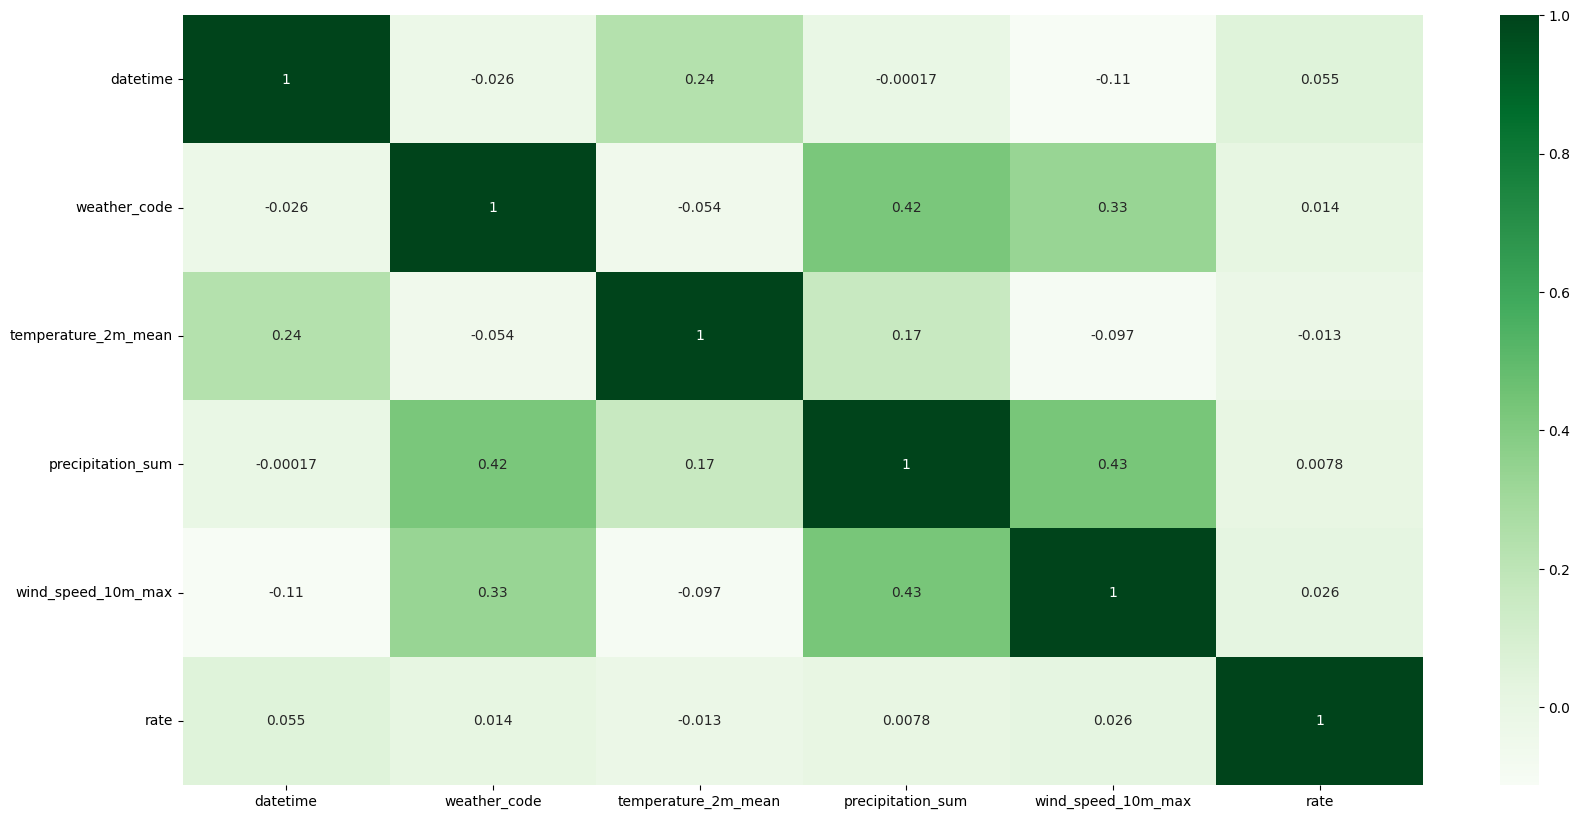

In [ ]:
# heatmap of correlation between all the features and value, but exclude datetime and conditions

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='Greens')
plt.show()

In [ ]:
df.to_csv('data_gabungan.csv', index=False)

In [ ]:
data_new = pd.read_csv('data_gabungan.csv')
data_new.head()

,datetime,weather_code,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,rate
0,2022-11-15,53,2.5,1.2,30.3,131.119995
1,2022-11-16,73,1.2,0.4,42.6,131.119995
2,2022-11-17,75,2.7,9.9,58.1,131.119995
3,2022-11-18,73,1.0,1.7,24.8,131.119995
4,2022-11-19,73,0.3,2.3,36.7,131.119995


In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47855 entries, 0 to 47854
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             47855 non-null  object 
 1   weather_code         47855 non-null  int64  
 2   temperature_2m_mean  47855 non-null  float64
 3   precipitation_sum    47855 non-null  float64
 4   wind_speed_10m_max   47855 non-null  float64
 5   rate                 47855 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.2+ MB


In [ ]:
pip install pandas matplotlib seaborn numpy scikit-learn xgboost pickle-mixin optuna tqdm


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.7 MB/s eta 0:00:00
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5990 sha256=925db4c6c40b2321c7f6cac716bd9db2062fecc956e4f6af564d6a8ea8952ce8
  Stored in directory: /root/.cache/pip/wheels/3e/c6/e9/d1b0a34e1efc6c3ec9c086623972c6de6317faddb2af0a619c
Successfully built pickle-mixin


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import pickle
import optuna
import tqdm

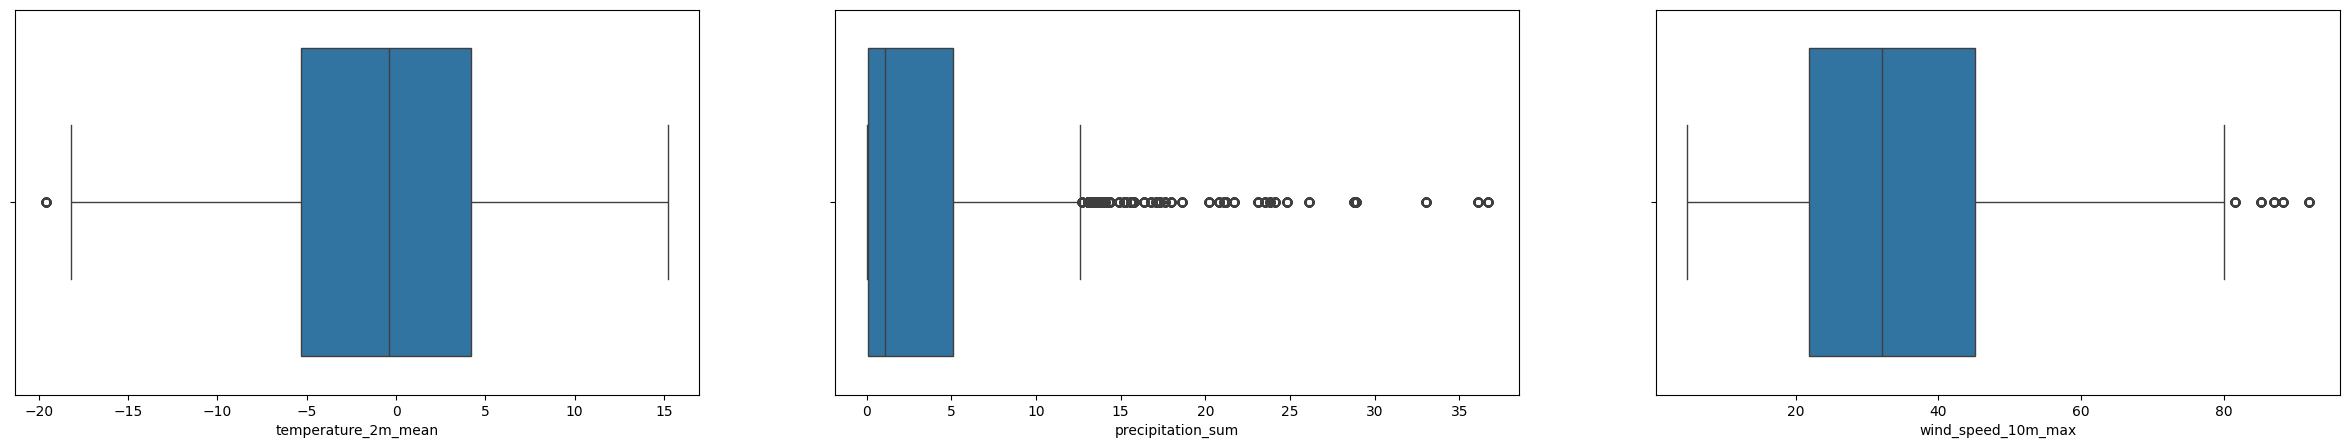

In [ ]:
# Identify numeric columns excluding datetime and value columns
features_col = data_new.select_dtypes(include=['number']).columns
features_col = [col for col in features_col if col not in ['datetime', 'rate', 'weather_code']]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 5))
axes = axes.flatten()

# Iterate over numeric columns
for i, column in enumerate(features_col):
    # Create boxplot only if the column is numeric
    sns.boxplot(x=data_new[column], ax=axes[i])

# Display the plots
plt.show()

In [ ]:
# Remove outliers
for column in features_col:
    q1 = data_new[column].quantile(0.25)
    q3 = data_new[column].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    data_new = data_new.loc[(data_new[column] > fence_low) & (data_new[column] < fence_high)]

# Display the modified data
data_new

,datetime,weather_code,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,rate
0,2022-11-15,53,2.5,1.2,30.3,131.119995
1,2022-11-16,73,1.2,0.4,42.6,131.119995
2,2022-11-17,75,2.7,9.9,58.1,131.119995
3,2022-11-18,73,1.0,1.7,24.8,131.119995
4,2022-11-19,73,0.3,2.3,36.7,131.119995
...,...,...,...,...,...,...
47849,2024-11-10,73,3.2,8.6,45.3,139.139999
47850,2024-11-11,71,4.2,8.3,68.9,139.139999
47852,2024-11-13,3,0.9,0.0,59.9,139.139999
47853,2024-11-14,75,4.8,12.1,70.7,139.139999


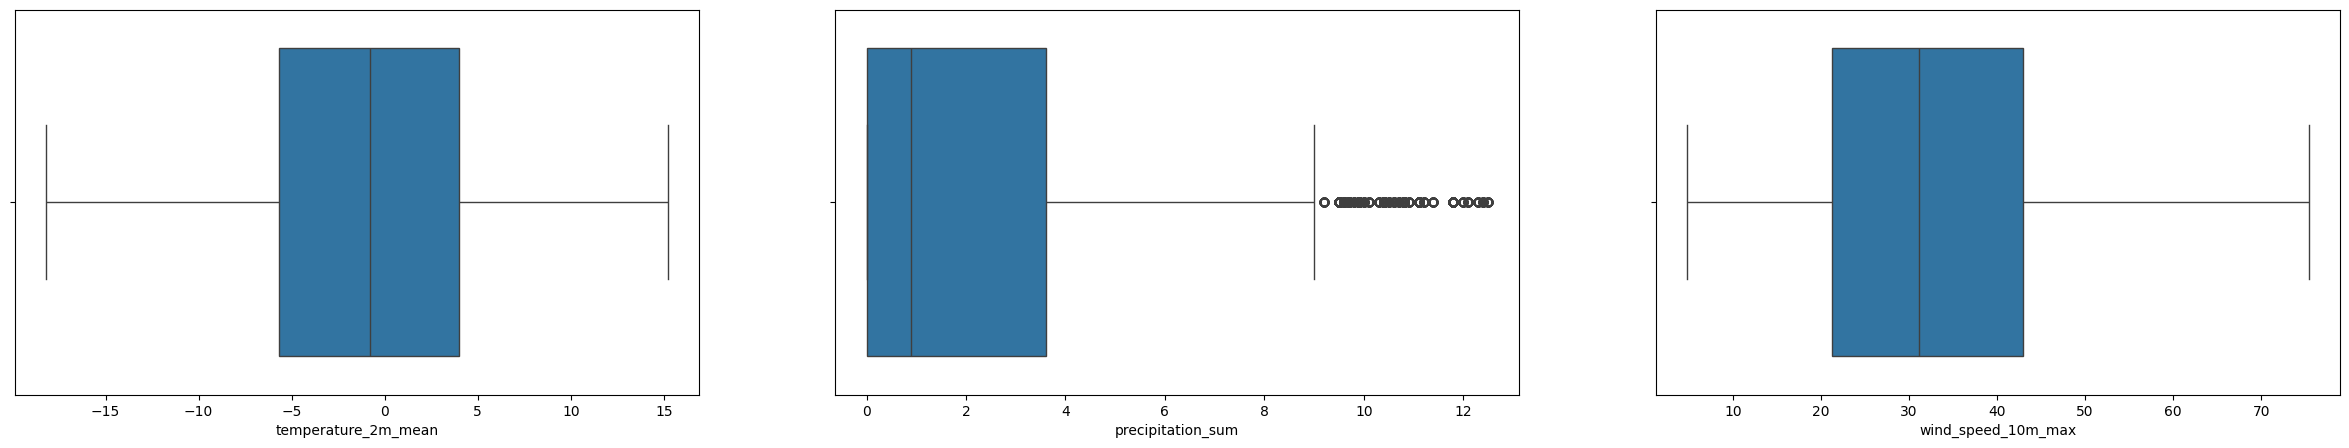

In [ ]:
# Identify numeric columns excluding datetime and value columns
features_col = data_new.select_dtypes(include=['number']).columns
features_col = [col for col in features_col if col not in ['datetime', 'rate', 'weather_code']]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 5))
axes = axes.flatten()

# Iterate over numeric columns
for i, column in enumerate(features_col):
    # Create boxplot only if the column is numeric
    sns.boxplot(x=data_new[column], ax=axes[i])

# Display the plots
plt.show()

In [ ]:
data_new['datetime'] = pd.to_datetime(data_new['datetime'])
data_new['month'] = data_new['datetime'].dt.month

# make value column as the last column

cols = list(data_new.columns.values)  # Make a list of all of the columns in the df
cols.pop(cols.index('rate'))  # Remove value from list
data_new = data_new[cols + ['rate']]
data_new

,datetime,weather_code,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,month,rate
0,2022-11-15,53,2.5,1.2,30.3,11,131.119995
1,2022-11-16,73,1.2,0.4,42.6,11,131.119995
2,2022-11-17,75,2.7,9.9,58.1,11,131.119995
3,2022-11-18,73,1.0,1.7,24.8,11,131.119995
4,2022-11-19,73,0.3,2.3,36.7,11,131.119995
...,...,...,...,...,...,...,...
47849,2024-11-10,73,3.2,8.6,45.3,11,139.139999
47850,2024-11-11,71,4.2,8.3,68.9,11,139.139999
47852,2024-11-13,3,0.9,0.0,59.9,11,139.139999
47853,2024-11-14,75,4.8,12.1,70.7,11,139.139999


In [ ]:
# Feature engineering: Convert 'datetime' to datetime format and extract the month
data_new['datetime'] = pd.to_datetime(data_new['datetime'])
data_new['month'] = data_new['datetime'].dt.month

# Data preprocessing: Separate features and target variable
X = data_new.drop(['datetime', 'rate'], axis=1)  # Features (excluding 'datetime' and 'rate')
y = data_new['rate']  # Target variable

# Train-test split based on datetime (80% train, 20% test)
train_size = int(0.8 * len(data_new))
train, test = data_new[:train_size], data_new[train_size:]

# Creating a mapping dictionary for month-to-mean target value in the training set
monthly_mean_train = train.groupby('month')['rate'].mean()
month_to_mean_train = dict(zip(monthly_mean_train.index, monthly_mean_train.values))

# Applying the mean target value for each month to the training set
train['month_mean'] = train['month'].map(month_to_mean_train)

# Applying the mean target value for each month to the test set with imputation for unseen months
test['month_mean'] = test['month'].map(month_to_mean_train)

# Impute missing values for months not seen in the training set
mean_target_value = train['rate'].mean()
test['month_mean'].fillna(mean_target_value, inplace=True)

# Splitting into X_train, X_test, y_train, y_test
X_train, y_train = train.drop(['datetime', 'rate'], axis=1), train['rate']
X_test, y_test = test.drop(['datetime', 'rate'], axis=1), test['rate']

# Checking the prepared data
print("Training set:")
print(X_train.head())
print("Test set:")
print(X_test.head())

Training set:
   weather_code  temperature_2m_mean  precipitation_sum  wind_speed_10m_max  \
0            53                  2.5                1.2                30.3   
1            73                  1.2                0.4                42.6   
2            75                  2.7                9.9                58.1   
3            73                  1.0                1.7                24.8   
4            73                  0.3                2.3                36.7   

   month  month_mean  
0     11  139.518929  
1     11  139.518929  
2     11  139.518929  
3     11  139.518929  
4     11  139.518929  
Test set:
       weather_code  temperature_2m_mean  precipitation_sum  \
38300             3                 -0.7                0.0   
38301             3                 -2.1                0.0   
38302            71                 -2.0                0.4   
38303            75                 -0.7                7.6   
38304            71                 -2.5        

<ipython-input-430-2809397cf548>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['month_mean'] = train['month'].map(month_to_mean_train)
<ipython-input-430-2809397cf548>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['month_mean'] = test['month'].map(month_to_mean_train)
<ipython-input-430-2809397cf548>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace meth

In [ ]:
# linear Regression

model = LinearRegression()
model.fit(X_train, y_train)

# Model prediction
y_pred = model.predict(X_test)

# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 4.012810618959978


In [ ]:
# XGBoostRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

# Model prediction
y_pred = model.predict(X_test)

# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 4.012848345230526


In [ ]:
# random forest regressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Model prediction
y_pred = model.predict(X_test)

# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 4.014746850565887


In [ ]:
# decision tree regressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Model prediction
y_pred = model.predict(X_test)

# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 4.012857986521189
